In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data Analyst Skill Test - Dataset - Transaction.csv')

In [3]:
df

,No,Month,Invoice Number,Transaction Date,Member ID,Product ID,Product Category,Product Name,Quantity,Unit Price,Disc,Total Price
0,1,Januari 2023,00005/SPMJ/I/23,01 Januari 2023,NaN,BS003,Biskuit,Biskuit C,12,20.0,"0,01",237.600
1,2,Januari 2023,00005/SPMJ/I/23,01 Januari 2023,NaN,SK003,Snack,Snack C,50,30.0,"0,06",1.410.000
2,3,Januari 2023,00005/SPMJ/I/23,01 Januari 2023,NaN,SK003,Snack,Snack C,50,30.0,"0,07",1.395.000
3,4,Januari 2023,00005/SPMJ/I/23,01 Januari 2023,NaN,KC005,Kacang,Kacang E,24,9.0,"0,05",205.200
4,5,Januari 2023,00005/SPMJ/I/23,01 Januari 2023,NaN,MRD005,Minuman (Ready to Drink),Drinks E,24,4500.0,"0,03",104.760
...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1550,Desember 2023,00449/SPMJ/I/23,31 Desember 2023,NaN,S003,Sereal,Sereal C,24,40.0,"0,07",892.800
1550,1551,Desember 2023,00449/SPMJ/I/23,31 Desember 2023,NaN,BS002,Biskuit,Biskuit B,12,50.0,"0,09",546.000
1551,1552,Desember 2023,00449/SPMJ/I/23,31 Desember 2023,NaN,SK002,Snack,Snack B,50,20.0,"0,05",950.000
1552,1553,Desember 2023,00449/SPMJ/I/23,31 Desember 2023,NaN,KC001,Kacang,Kacang A,24,20.0,"0,04",460.800


At this stage, we will check for problematic data, such as duplicate data or null (empty) values.

In [4]:
df.isna().sum()

,0
No,0
Month,0
Invoice Number,0
Transaction Date,0
Member ID,896
Product ID,0
Product Category,0
Product Name,0
Quantity,0
Unit Price,0


In [5]:
df.duplicated().sum()

0

There are no duplicate data in this dataset, but there are null values in the Member ID column. This may occur because some customers are not members.

Next, let's examine the data structure types and check for any abnormal data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No                1554 non-null   int64  
 1   Month             1554 non-null   object 
 2   Invoice Number    1554 non-null   object 
 3   Transaction Date  1554 non-null   object 
 4   Member ID         658 non-null    object 
 5   Product ID        1554 non-null   object 
 6   Product Category  1554 non-null   object 
 7   Product Name      1554 non-null   object 
 8   Quantity          1554 non-null   int64  
 9   Unit Price        1554 non-null   float64
 10  Disc              1554 non-null   object 
 11  Total Price       1554 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 145.8+ KB


In [7]:
df.describe()

,No,Quantity,Unit Price
count,1554.000000,1554.000000,1554.000000
mean,777.500000,27.299871,1207.126126
std,448.745474,11.574732,1956.422906
min,1.000000,12.000000,5.000000
25%,389.250000,24.000000,14.000000
50%,777.500000,24.000000,20.000000
75%,1165.750000,24.000000,3000.000000
max,1554.000000,50.000000,5000.000000


We found that there are incorrect values in the unit price. There are some extremely large numbers that do not align with the values in the total price column. We will conduct a deeper analysis.

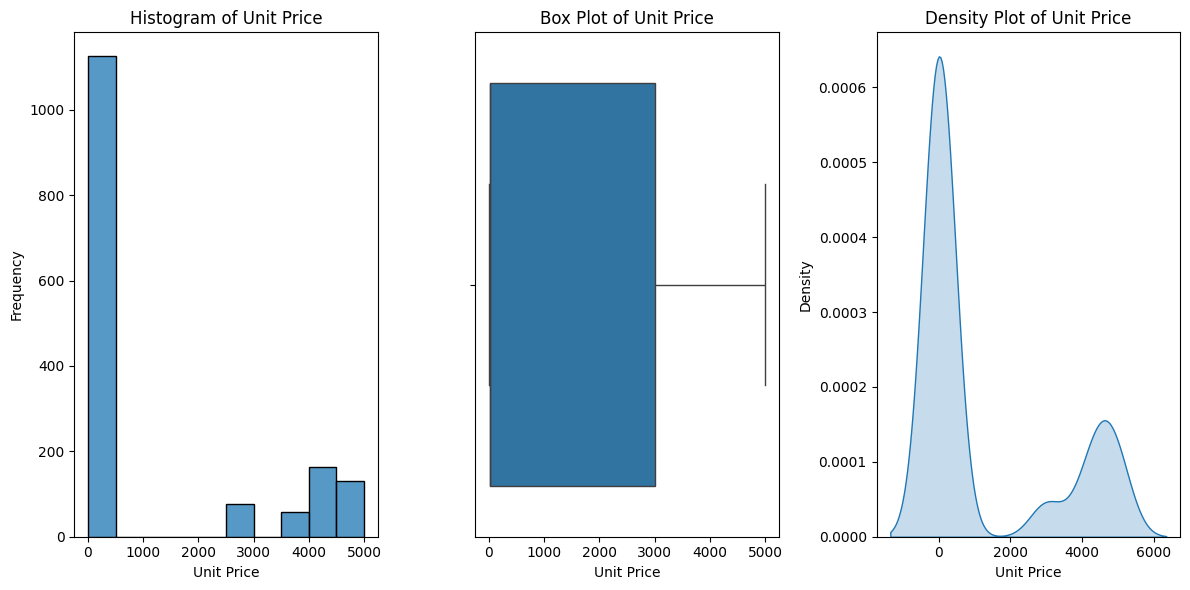

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['Unit Price'], kde=False, bins=10)
plt.title('Histogram of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')


plt.subplot(1, 3, 2)
sns.boxplot(x=df['Unit Price'])
plt.title('Box Plot of Unit Price')
plt.xlabel('Unit Price')

plt.subplot(1, 3, 3)
sns.kdeplot(df['Unit Price'], fill=True)
plt.title('Density Plot of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [9]:
filtered_df = df[df['Unit Price'] > 1000]
filtered_df

,No,Month,Invoice Number,Transaction Date,Member ID,Product ID,Product Category,Product Name,Quantity,Unit Price,Disc,Total Price
4,5,Januari 2023,00005/SPMJ/I/23,01 Januari 2023,NaN,MRD005,Minuman (Ready to Drink),Drinks E,24,4500.0,"0,03",104.760
6,7,Januari 2023,00005/SPMJ/I/23,01 Januari 2023,NaN,MRD001,Minuman (Ready to Drink),Drinks A,24,5000.0,"0,06",112.800
9,10,Januari 2023,00008/SPMJ/I/23,05 Januari 2023,MSPM557,MRD004,Minuman (Ready to Drink),Drinks D,24,3000.0,"0,01",71.280
16,17,Januari 2023,00008/SPMJ/I/23,05 Januari 2023,MSPM557,MRD001,Minuman (Ready to Drink),Drinks A,24,5000.0,"0,07",111.600
17,18,Januari 2023,00008/SPMJ/I/23,05 Januari 2023,MSPM557,MRD004,Minuman (Ready to Drink),Drinks D,24,3000.0,"0,02",70.560
...,...,...,...,...,...,...,...,...,...,...,...,...
1528,1529,Desember 2023,00447/SPMJ/I/23,22 Desember 2023,MSPM656,MRD005,Minuman (Ready to Drink),Drinks E,24,4500.0,"0,09",98.280
1531,1532,Desember 2023,00466/SPMJ/I/23,22 Desember 2023,NaN,MRD002,Minuman (Ready to Drink),Drinks B,24,4500.0,"0,02",105.840
1537,1538,Desember 2023,00466/SPMJ/I/23,22 Desember 2023,NaN,MRD002,Minuman (Ready to Drink),Drinks B,24,4500.0,"0,07",100.440
1538,1539,Desember 2023,00468/SPMJ/I/23,23 Desember 2023,MSPM133,MRD002,Minuman (Ready to Drink),Drinks B,24,4500.0,"0,11",96.120


In [10]:
filtered_df['Unit Price'].unique()

array([4500., 5000., 3000., 4000.])

Anomaly values have been identified, and we will proceed to correct them.

In [11]:
value_mapping = {
    3000: 3,
    4000: 4,
    4500: 4.5,
    5000: 5
}
df['Unit Price'] = df['Unit Price'].replace(value_mapping)
df

,No,Month,Invoice Number,Transaction Date,Member ID,Product ID,Product Category,Product Name,Quantity,Unit Price,Disc,Total Price
0,1,Januari 2023,00005/SPMJ/I/23,01 Januari 2023,NaN,BS003,Biskuit,Biskuit C,12,20.0,"0,01",237.600
1,2,Januari 2023,00005/SPMJ/I/23,01 Januari 2023,NaN,SK003,Snack,Snack C,50,30.0,"0,06",1.410.000
2,3,Januari 2023,00005/SPMJ/I/23,01 Januari 2023,NaN,SK003,Snack,Snack C,50,30.0,"0,07",1.395.000
3,4,Januari 2023,00005/SPMJ/I/23,01 Januari 2023,NaN,KC005,Kacang,Kacang E,24,9.0,"0,05",205.200
4,5,Januari 2023,00005/SPMJ/I/23,01 Januari 2023,NaN,MRD005,Minuman (Ready to Drink),Drinks E,24,4.5,"0,03",104.760
...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1550,Desember 2023,00449/SPMJ/I/23,31 Desember 2023,NaN,S003,Sereal,Sereal C,24,40.0,"0,07",892.800
1550,1551,Desember 2023,00449/SPMJ/I/23,31 Desember 2023,NaN,BS002,Biskuit,Biskuit B,12,50.0,"0,09",546.000
1551,1552,Desember 2023,00449/SPMJ/I/23,31 Desember 2023,NaN,SK002,Snack,Snack B,50,20.0,"0,05",950.000
1552,1553,Desember 2023,00449/SPMJ/I/23,31 Desember 2023,NaN,KC001,Kacang,Kacang A,24,20.0,"0,04",460.800


Here, we will to change the data types of the Discount and Total Price columns from object to float. We will also change the data type of the Transaction Date column from object to date data processing. We will also correct the values in the Unit Price column and add a new column called Original Price.

In [12]:
df['Disc'] = df['Disc'].str.replace(',', '.').astype(float)
df['Original Price'] = df['Quantity'] * df['Unit Price']

In [13]:
def convert_to_float(value):

    value = value.replace('.', '')
    if len(value) > 3:
        value = value[:-3] + '.' + value[-3:]
    return float(value)

df['Total Price'] = df['Total Price'].apply(convert_to_float)

In [14]:
month_mapping = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}

for indonesian, english in month_mapping.items():
    df['Transaction Date'] = df['Transaction Date'].str.replace(indonesian, english)

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%d %B %Y')

We will save the cleaned dataset to a file in CSV format for creating a dashboard in Looker Studio.

In [15]:
df.to_csv('Data Analyst Skill Test - Dataset - Transaction - Clean_fix', index=False)

In [16]:
df

,No,Month,Invoice Number,Transaction Date,Member ID,Product ID,Product Category,Product Name,Quantity,Unit Price,Disc,Total Price,Original Price
0,1,Januari 2023,00005/SPMJ/I/23,2023-01-01,NaN,BS003,Biskuit,Biskuit C,12,20.0,0.01,237.60,240.0
1,2,Januari 2023,00005/SPMJ/I/23,2023-01-01,NaN,SK003,Snack,Snack C,50,30.0,0.06,1410.00,1500.0
2,3,Januari 2023,00005/SPMJ/I/23,2023-01-01,NaN,SK003,Snack,Snack C,50,30.0,0.07,1395.00,1500.0
3,4,Januari 2023,00005/SPMJ/I/23,2023-01-01,NaN,KC005,Kacang,Kacang E,24,9.0,0.05,205.20,216.0
4,5,Januari 2023,00005/SPMJ/I/23,2023-01-01,NaN,MRD005,Minuman (Ready to Drink),Drinks E,24,4.5,0.03,104.76,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1550,Desember 2023,00449/SPMJ/I/23,2023-12-31,NaN,S003,Sereal,Sereal C,24,40.0,0.07,892.80,960.0
1550,1551,Desember 2023,00449/SPMJ/I/23,2023-12-31,NaN,BS002,Biskuit,Biskuit B,12,50.0,0.09,546.00,600.0
1551,1552,Desember 2023,00449/SPMJ/I/23,2023-12-31,NaN,SK002,Snack,Snack B,50,20.0,0.05,950.00,1000.0
1552,1553,Desember 2023,00449/SPMJ/I/23,2023-12-31,NaN,KC001,Kacang,Kacang A,24,20.0,0.04,460.80,480.0


Next, I will try a simple forecasting to predict the revenue for the next year using the ARIMA method. We will analyze it in monthly and weekly units.

In [17]:
!pip install statsmodels pandas matplotlib


In [18]:
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import warnings



Let's try converting the Transaction Date data to a monthly format.

In [19]:
import plotly.express as px

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

df['Year-Month'] = df['Transaction Date'].dt.to_period('M').astype(str)

monthly_revenue = df.groupby('Year-Month')['Total Price'].sum().reset_index()

monthly_revenue.columns = ['Month', 'Total Revenue']

figure = px.line(monthly_revenue, x='Month', y='Total Revenue', title='Total Price Over Time')
figure.show()

We want to understand the patterns in this dataset.

<Figure size 640x480 with 0 Axes>

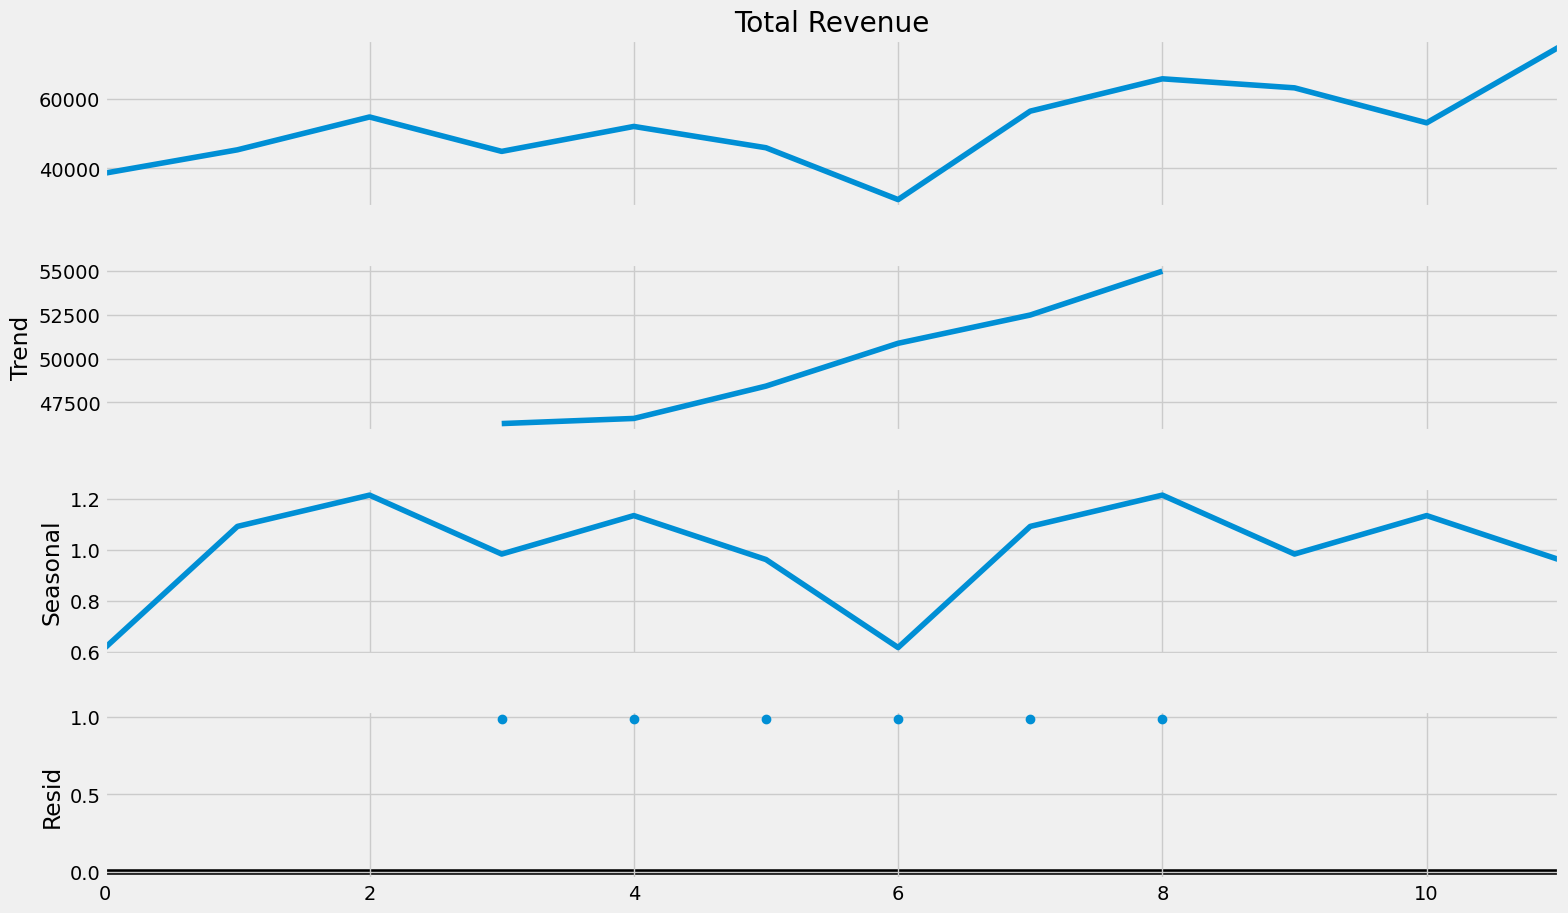

In [20]:
result = seasonal_decompose(monthly_revenue['Total Revenue'], model='multiplicative', period=6)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(18.5, 10.5)


It was found that the pattern is seasonal. variable d is The seasonal differencing order. d = 0 for non-seasonal differencing and use d for seasonal differencing to make the series stationary, so the variable d = 1


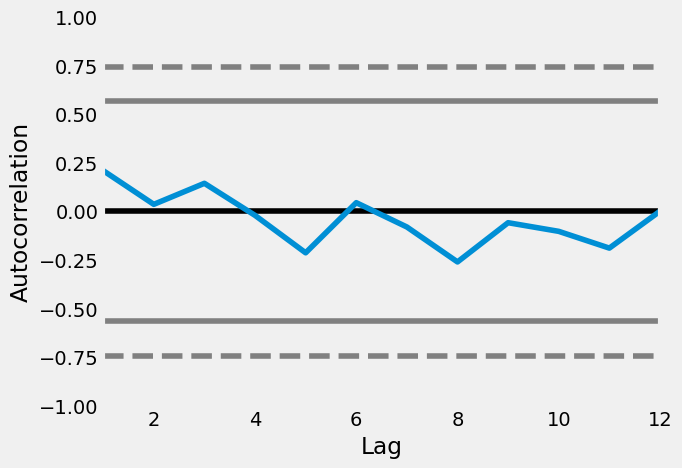

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

pd.plotting.autocorrelation_plot(monthly_revenue['Total Revenue'])
plt.show()


The ACF plot intersects only at 1 line, so we will use q = 1

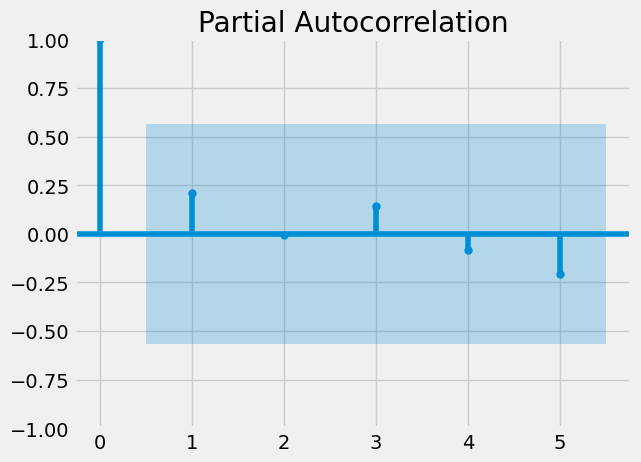

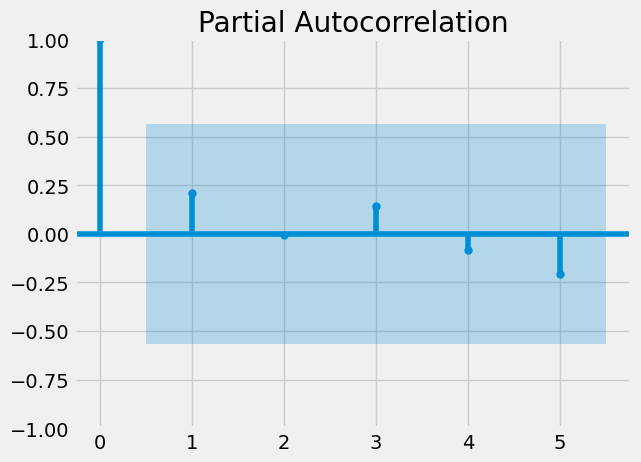

In [22]:
plot_pacf(monthly_revenue['Total Revenue'], lags=5)

In the partial autocorrelation plot, only one bar is in 1.0 or close to 1.0, so we will use p = 1

In [23]:
d = 1

In [24]:
p = 1

In [25]:
q = 1

In [26]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

model = sm.tsa.statespace.SARIMAX(monthly_revenue['Total Revenue'], order=(p, d, q), seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Total Revenue   No. Observations:                   12
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Fri, 09 Aug 2024   AIC                             10.000
Time:                                    14:17:43   BIC                                nan
Sample:                                         0   HQIC                               nan
                                             - 12                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/tools/eval_measures.py:414: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/tools/eval_measures.py:439: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3014: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3014: RuntimeWarning:

invalid value encountered in divide

/u

Let's proceed to implement the forecasting model.

In [27]:
predictions = model.predict(start=len(monthly_revenue), end=len(monthly_revenue) + 12)
print(predictions)

12     94231.209652
13    100944.949652
14    110416.589652
15    100493.409652
16    107688.089652
17    101540.669652
18     86584.009652
19    112099.529652
20    121430.049652
21    118821.789652
22    108731.089652
23    130552.929652
24    149856.099303
Name: predicted_mean, dtype: float64


The forecasting results are as follows. This represents the monthly forecast for the next year.

<Axes: >

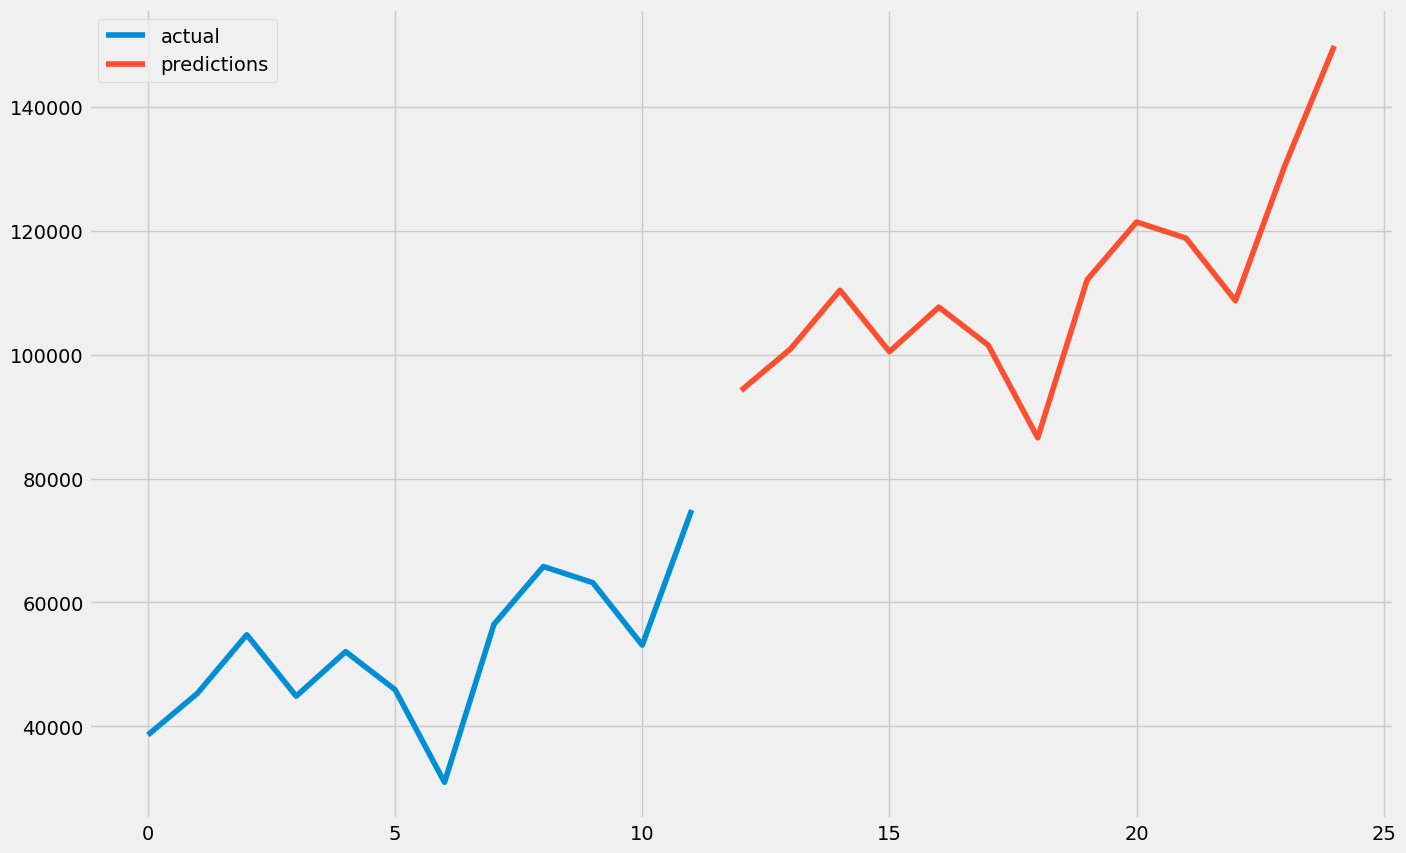

In [28]:
monthly_revenue['Total Revenue'].plot(legend=True,
                       label='actual',
                       figsize=(15,10))
predictions.plot(legend=True, label='predictions')

Now let's see how the forecasting looks on weekly

In [29]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Year-Week'] = df['Transaction Date'].dt.to_period('W').astype(str)

weekly_revenue = df.groupby('Year-Week')['Total Price'].sum().reset_index()
weekly_revenue.columns = ['Week', 'Total Revenue']

figure = px.line(weekly_revenue, x='Week', y='Total Revenue', title='Total Price Over Time')
figure.show()

<Figure size 640x480 with 0 Axes>

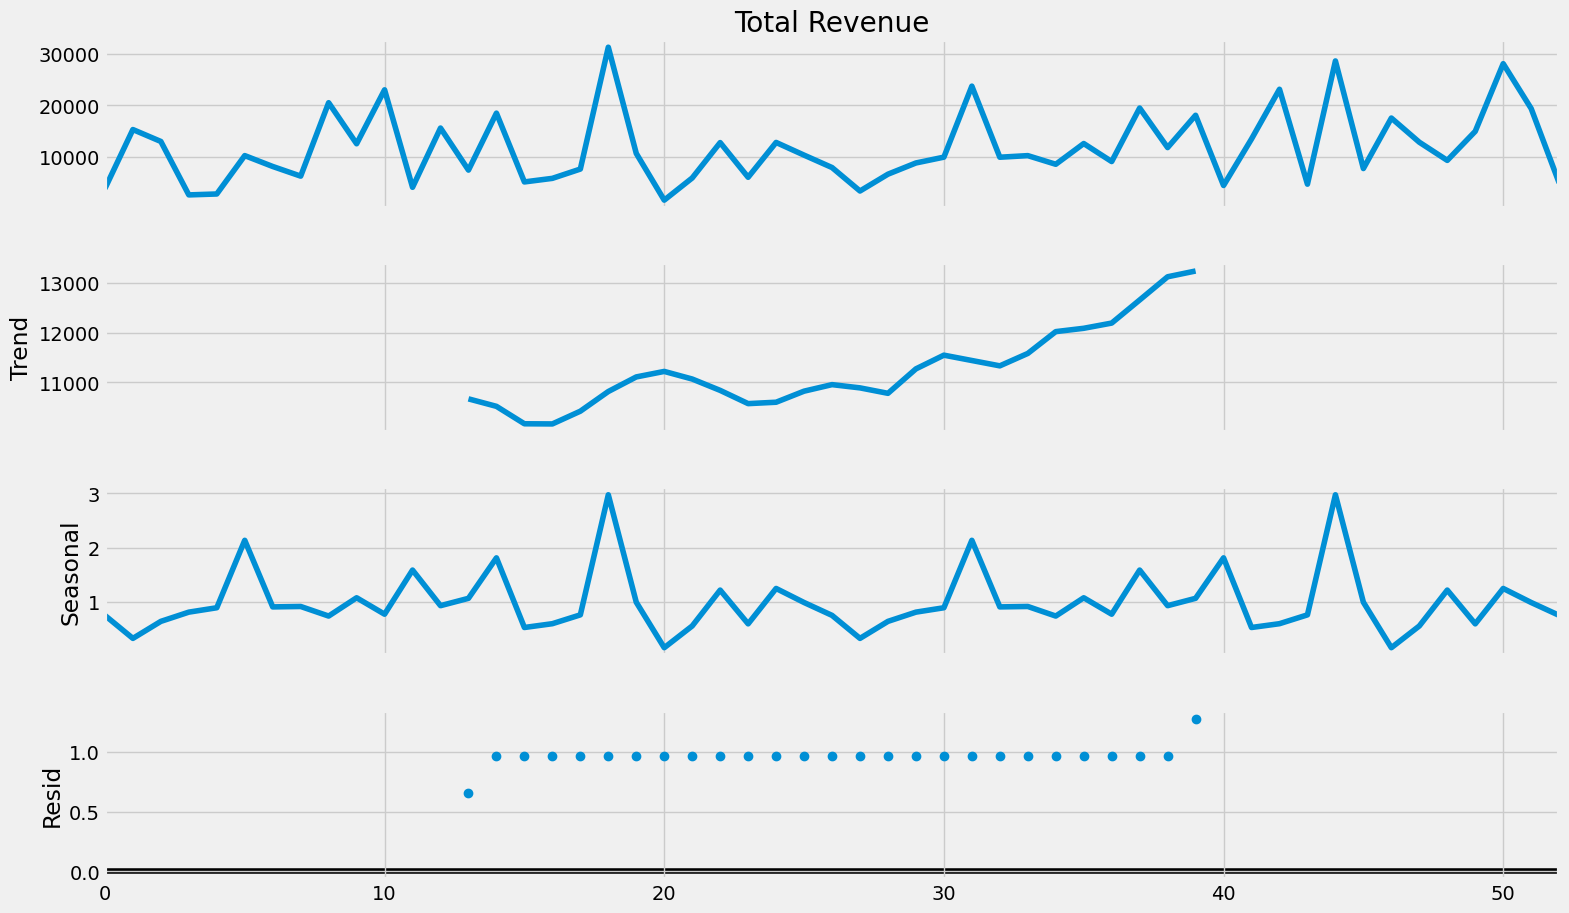

In [30]:
result = seasonal_decompose(weekly_revenue['Total Revenue'], model='multiplicative', period=26)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(18.5, 10.5)


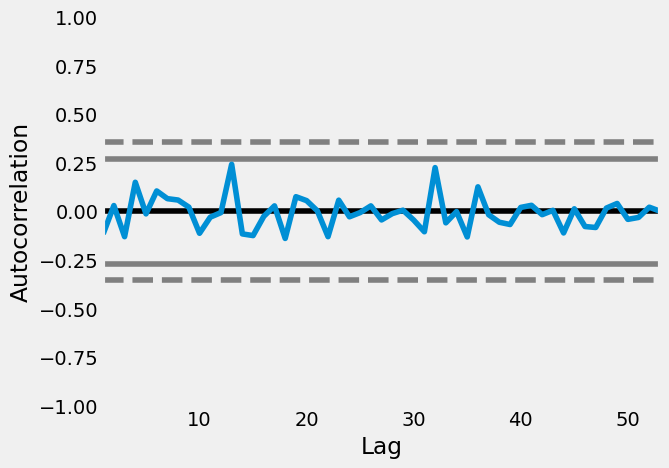

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

pd.plotting.autocorrelation_plot(weekly_revenue['Total Revenue'])
plt.show()


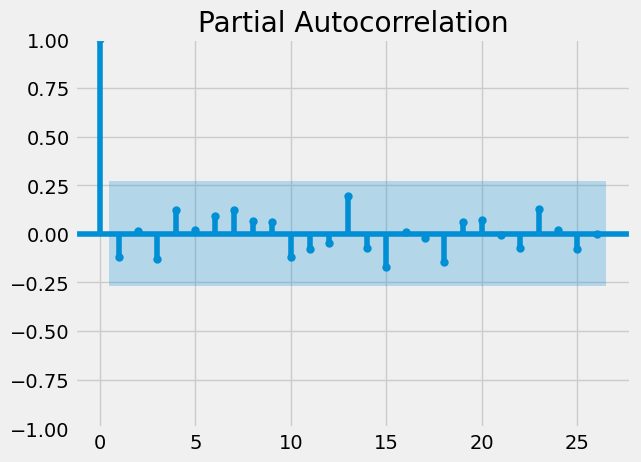

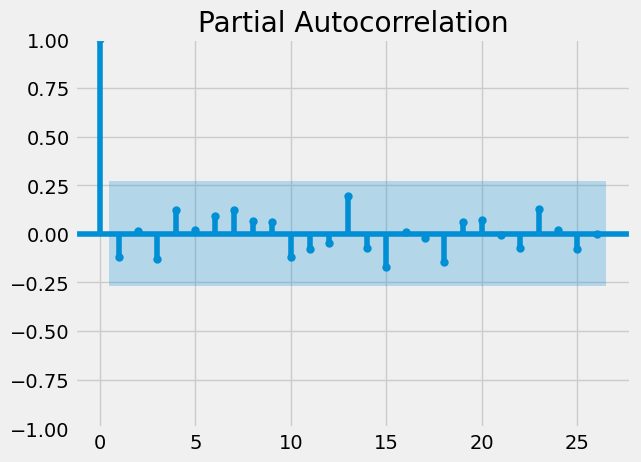

In [32]:
plot_pacf(weekly_revenue['Total Revenue'], lags=26)

In [33]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

model = sm.tsa.statespace.SARIMAX(weekly_revenue['Total Revenue'], order=(p, d, q), seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Total Revenue   No. Observations:                   53
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -413.890
Date:                            Fri, 09 Aug 2024   AIC                            837.780
Time:                                    14:17:52   BIC                            846.224
Sample:                                         0   HQIC                           840.833
                                             - 53                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2466      0.257     -0.959      0.338      -0.751       0.258
ma.L1         -0.8219      0.202   

In [34]:
predictions = model.predict(start=len(weekly_revenue), end=len(weekly_revenue) + 52)
print(predictions)

53     17981.638426
54     21399.523273
55     19936.585757
56     17111.902997
57     16515.350381
58     20278.024491
59     15168.313642
60     19315.753678
61     21477.005955
62     20508.795823
63     16165.174344
64     14844.119313
65     18638.554585
66     25507.780527
67     19665.693058
68     23087.165020
69     17819.968375
70     22965.255905
71     17956.723195
72     20343.412626
73     23297.348101
74     25556.330418
75     20219.453594
76     15901.429428
77     21800.365627
78     27875.324656
79     23041.023489
80     25025.049973
81     20832.722021
82     25659.824763
83     20628.007638
84     23419.903651
85     26191.416670
86     27707.715941
87     22599.419816
88     18971.096744
89     24385.718115
90     30643.464065
91     25577.238148
92     27892.068079
93     23452.377514
94     28352.705034
95     23326.246418
96     26024.891079
97     28838.385501
98     30525.600549
99     25364.700493
100    21577.654532
101    27103.732662
102    33319.413334


Here is the weekly forecasting result for the next year.

<Axes: >

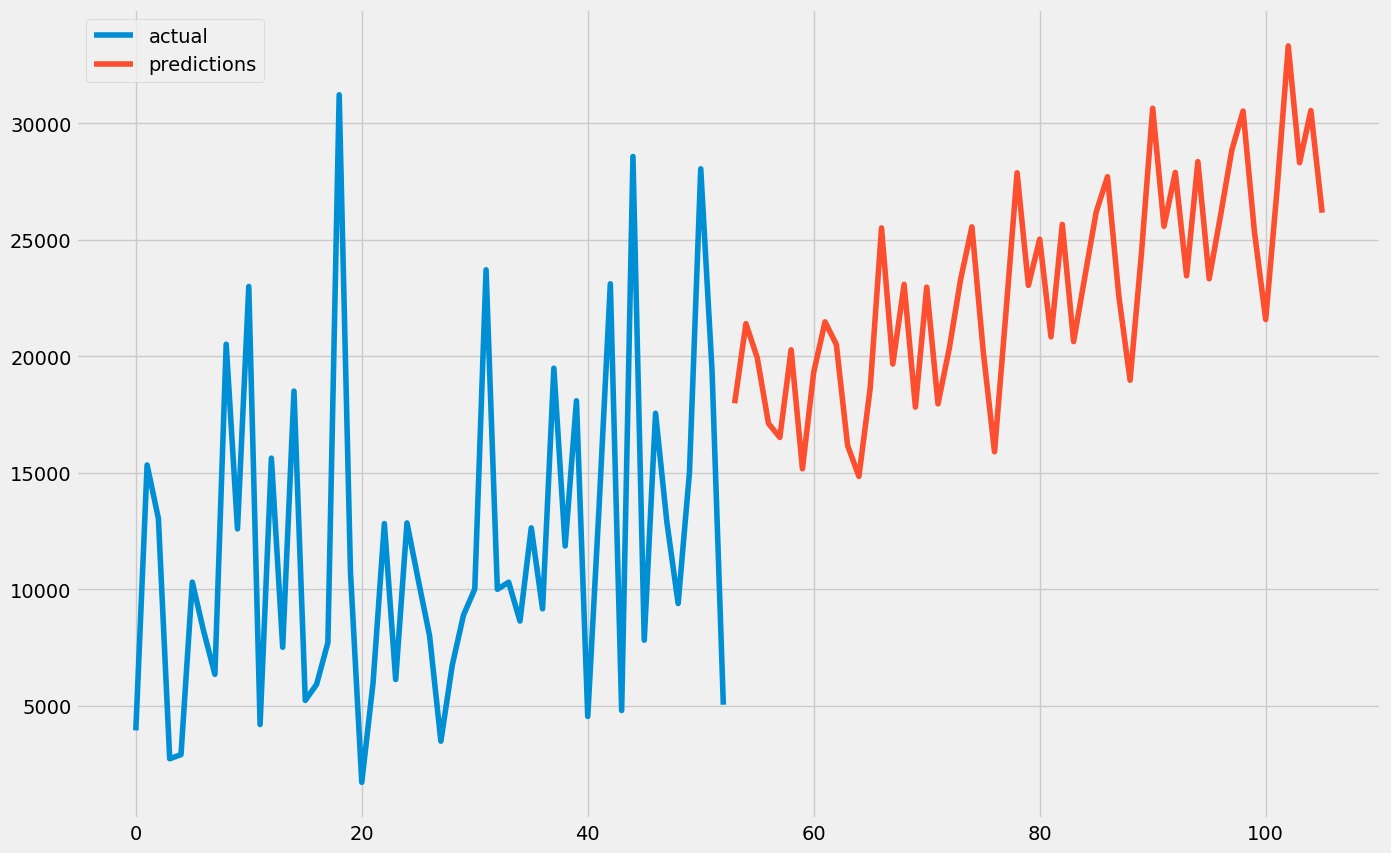

In [35]:
weekly_revenue['Total Revenue'].plot(legend=True,
                       label='actual',
                       figsize=(15,10))
predictions.plot(legend=True, label='predictions')

Notes:

1. The forecasting model are very basic, so the result is not optimized

2. Further analysis is needed to improve score, needed to tune hyperparameters, and compare with other forecasting models.